In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import seaborn as sns


data = pd.read_csv('data/Austin_Final_2022-06-18.csv')

data.head()


,city_ID,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,address,location_name,diameter_breast_height_CM,...,most_recent_observation,retired_date,most_recent_observation_type,location_type,zipcode,neighborhood,ward,district,overhead_utility,percent_population
0,7,Escarpment live oak,Quercus fusiformis,Austin,Texas,-97.736905,30.273151,1201 Red River St,Waterloo neighborhood park,68.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63,American elm,Ulmus americana,Austin,Texas,-97.736577,30.273910,1201 Red River St,Waterloo neighborhood park,55.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,82,Escarpment live oak,Quercus fusiformis,Austin,Texas,-97.736597,30.273360,1201 Red River St,Waterloo neighborhood park,86.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93,Pecan,Carya illinoinensis,Austin,Texas,-97.736319,30.273816,1201 Red River St,Waterloo neighborhood park,76.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,94,Southern live oak,Quercus virginiana,Austin,Texas,-97.736167,30.273598,1201 Red River St,Waterloo neighborhood park,50.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# one hot tree types
tree_types  = pd.get_dummies(data['common_name'])

# convert condition to numerical
condition = data['condition'].replace({'excellent': 0, 'good': 1, 'fair': 2, 'poor': 3, 'dead/dying': 4, 'dead': 4})

# one hot native column
native = pd.get_dummies(data['native'])

# create new dataframe with latitude and longitude, tree_types, native, and condition
all_data = pd.concat([data[['longitude_coordinate', 'latitude_coordinate']], 
                      tree_types, 
                      native, 
                      condition], 
                      axis=1)

# drop no_info column
all_data = all_data.drop(columns=['no_info'])

# drop rows the NaN values for condition
all_data = all_data.dropna()

all_data.head()



,longitude_coordinate,latitude_coordinate,Afghan pine,American elm,American hornbeam,American persimmon,American sweet gum,American sycamore,Anacacho orchid tree,Arizona ash,...,Windmill palm,Yaupon,Yew pine,large vacant planting site,medium vacant planting site,small vacant planting site,tree,introduced,naturally_occurring,condition
0,-97.736905,30.273151,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,3.0
1,-97.736577,30.273910,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,2.0
2,-97.736597,30.273360,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,3.0
3,-97.736319,30.273816,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,3.0
4,-97.736167,30.273598,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,2.0


In [37]:
# split data back into x and y
x_data = all_data.drop(['condition'], axis=1)
y_data = all_data['condition']

# print unique values in y_data
print(y_data.unique())

[3. 2. 1. 0. 4.]


In [38]:
# # standardize x_data
# scaler = StandardScaler()
# x_data = scaler.fit_transform(x_data)

In [39]:
# split into train and test
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=25)

In [40]:
# split into x and y
x_train = train_data.drop(['condition'], axis=1)
y_train = train_data['condition']
x_test = test_data.drop(['condition'], axis=1)
y_test = test_data['condition']

x_train.head()

,longitude_coordinate,latitude_coordinate,Afghan pine,American elm,American hornbeam,American persimmon,American sweet gum,American sycamore,Anacacho orchid tree,Arizona ash,...,White mulberry,Windmill palm,Yaupon,Yew pine,large vacant planting site,medium vacant planting site,small vacant planting site,tree,introduced,naturally_occurring
5785,-97.746081,30.274194,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
242,-97.736156,30.270423,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1802,-97.740765,30.280372,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3507,-97.747891,30.270616,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3620,-97.747461,30.281097,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [41]:
# x_train = train_data.iloc
# y_train = train_data.iloc[:,-5:]
# x_test = test_data.iloc[:, 0:-5]
# y_test = test_data.iloc[:,-5:]

In [42]:
print(y_test)

1621    3.0
7120    2.0
1025    2.0
7089    3.0
425     1.0
       ... 
1712    1.0
2231    2.0
4189    1.0
4745    2.0
5506    1.0
Name: condition, Length: 1180, dtype: float64


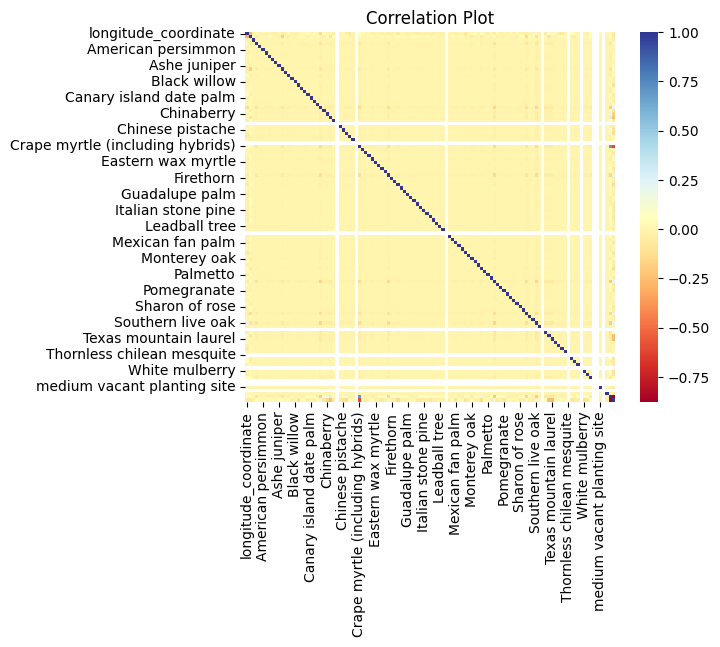

In [43]:
# compute correlation matrix
corr_df = x_train
cor = corr_df.corr(method='pearson') 
# print(cor)

# Plot
fig_corr, ax_corr =plt.subplots()
plt.title("Correlation Plot")
sns.heatmap(cor, cmap=plt.cm.RdYlBu, square=True, ax=ax_corr)
plt.show()


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# train logistic regression model on training data
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

# predict on test data
y_pred = logistic_regression.predict(x_test)

# compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)



0.5076271186440678


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# optimize logistic regression model
from sklearn.model_selection import GridSearchCV

# initialize logistic regression model parameters
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 1000)   

# create empty accuracy list
accuracy = []

# loop through parameters
for p in penalty:
    for c in C:
        # initialize logistic regression model
        logistic_regression = LogisticRegression(penalty=p, C=c, solver='liblinear')
        
        # fit model
        logistic_regression.fit(x_train, y_train)
        
        # predict on test data
        y_pred = logistic_regression.predict(x_test)
        
        # compute accuracy
        accuracy.append(accuracy_score(y_test, y_pred))

# find max accuracy
max_accuracy = max(accuracy)
print(max_accuracy)

# find index of max accuracy
max_accuracy_index = accuracy.index(max_accuracy)
print(max_accuracy_index)

# find parameters that correspond to max accuracy
penalty = penalty[max_accuracy_index // len(C)]
C = C[max_accuracy_index % len(C)]

# plot accuracy
plt.plot(accuracy)
plt.show()






/home/vscode/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear fail

KeyboardInterrupt: 

In [46]:
# return optimal parameters
print(penalty)
print(C)

# initialize logistic regression model with optimal parameters
logistic_regression = LogisticRegression(penalty=penalty, C=C, solver='liblinear')

# fit model
logistic_regression.fit(x_train, y_train)

# predict on test data
y_pred = logistic_regression.predict(x_test)

# compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

l1
5214.00828799969
0.5203389830508475
